In [15]:
import bluepy
import numpy as np
import analysis_exp_25_decoupled
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
%matplotlib inline


In [5]:
bcs = analysis_exp_25_decoupled.get_configs_network();
print bcs
sim = bluepy.Simulation(bcs[0])
spikes = sim.v2.reports['spikes']
df = spikes.data(t_start=1500)

['/gpfs/bbp.cscs.ch/project/proj9/simulations/nolte/variability/experiment_25/new_exp_25_id0_n30/seed100/BlueConfig', '/gpfs/bbp.cscs.ch/project/proj9/simulations/nolte/variability/experiment_25/new_exp_25_id0_n30/seed101/BlueConfig', '/gpfs/bbp.cscs.ch/project/proj9/simulations/nolte/variability/experiment_25/new_exp_25_id0_n30/seed102/BlueConfig', '/gpfs/bbp.cscs.ch/project/proj9/simulations/nolte/variability/experiment_25/new_exp_25_id0_n30/seed103/BlueConfig', '/gpfs/bbp.cscs.ch/project/proj9/simulations/nolte/variability/experiment_25/new_exp_25_id0_n30/seed104/BlueConfig', '/gpfs/bbp.cscs.ch/project/proj9/simulations/nolte/variability/experiment_25/new_exp_25_id0_n30/seed105/BlueConfig', '/gpfs/bbp.cscs.ch/project/proj9/simulations/nolte/variability/experiment_25/new_exp_25_id0_n30/seed106/BlueConfig', '/gpfs/bbp.cscs.ch/project/proj9/simulations/nolte/variability/experiment_25/new_exp_25_id0_n30/seed107/BlueConfig', '/gpfs/bbp.cscs.ch/project/proj9/simulations/nolte/variability/

In [11]:
from bluepy.v2 import Cell

df = df[(df > 1500) & (df < 6500)]
circuit = sim.circuit
cells = circuit.v2.cells({Cell.HYPERCOLUMN: 2})
ys = np.array(cells['y'])
gids = np.array(list(sim.get_circuit_target()))
sort_idx = np.argsort(ys)
sort_dict = dict(zip(sort_idx + gids.min(), np.arange(gids.size)))

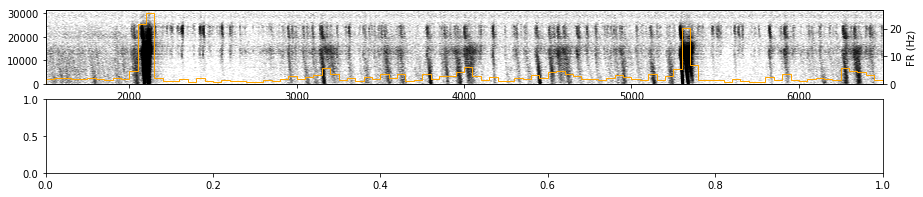

In [23]:
fig, axs = plt.subplots(2, figsize=(15, 3))
ax = axs[0]
t_window = 50

gids_spiking = np.array(df.axes[0])
gids_spiking = np.vectorize(sort_dict.get)(gids_spiking)
times = np.array(df)
ax.vlines(times, gids_spiking, gids_spiking + 200, rasterized=True, lw=0.1)
ax2 = ax.twinx()
ax2.hist(times, bins=np.linspace(1500, 6500, 101), histtype='step', weights=np.zeros(times.size) + (1000.0/50.0)/gids.size, color='orange')
ax2.set_ylabel('FR (Hz)')
# ax2.set_ylim([0, 3])
ax.set_ylim([0, 31346])
ax.set_xlim([1500, 6500])

ax.set_yticks([0, 10000, 20000, 30000])

#ax2.set_yticks([0, 1, 2, 3])
plt.savefig('figures_stim/longraster.pdf', dpi=300)